In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

import tensorflow as tf
import keras

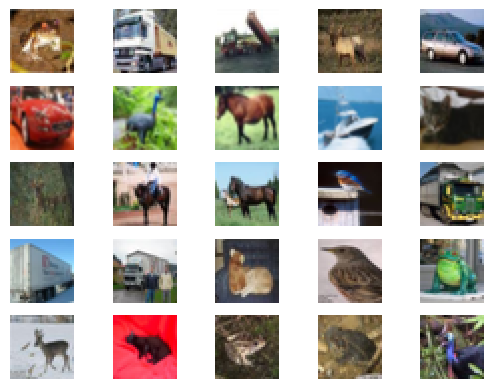

In [5]:
def show_imgs(X):
    plt.figure(1)
    k = 0
    for i in range(0,5):
        for j in range(0,5):
            plt.subplot2grid((5,5),(i,j))
            plt.imshow(X[k], cmap='gray')
            k = k+1
            plt.axis('off')
    plt.show()
    
# Load data & split data between train and test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

show_imgs(X_train)

In [7]:
  
X_train =  X_train.astype(np.float32)   
X_test =   X_test.astype(np.float32)    
X_train /= X_train.max()                
X_test /=  X_test.max()                 
print(X_train.shape, 'train samples')
print(X_test.shape, 'test samples')

(50000, 32, 32, 3) train samples
(10000, 32, 32, 3) test samples


In [8]:
n_classes = 10
Y_train = keras.utils.to_categorical(y_train)
Y_test = keras.utils.to_categorical(y_test)   
print(Y_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


## Part 1: Single conv layer

In [12]:
# defining the model
input_dim = X_train.shape[1:]
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), padding='same', input_shape = input_dim))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy']) 
model.summary()

c:\Users\Milena\Documents\Studium\Mastah\DL\DeLearn\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        81,930 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82,826 (323.54 KB)

 Trainable params: 82,826 (323.54 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Training
E = 20
B = 128
log = model.fit(X_train, Y_train, batch_size=B, epochs=E, validation_split= 0.1)

Epoch 1/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6837 - loss: 0.9228 - val_accuracy: 0.6310 - val_loss: 1.0916
Epoch 2/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6875 - loss: 0.9070 - val_accuracy: 0.6452 - val_loss: 1.0494
Epoch 3/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6943 - loss: 0.8892 - val_accuracy: 0.6378 - val_loss: 1.0617
Epoch 4/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7048 - loss: 0.8623 - val_accuracy: 0.6306 - val_loss: 1.0881
Epoch 5/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7091 - loss: 0.8522 - val_accuracy: 0.6528 - val_loss: 1.0338
Epoch 6/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7151 - loss: 0.8288 - val_accuracy: 0.6518 - val_loss: 1.0331
Epoch 7/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7237 - loss: 0.8125 - val_accuracy: 0.6532 - val_loss: 1.0513
Epoch 8/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7251 - loss: 0.8015 - val_accuracy: 0.

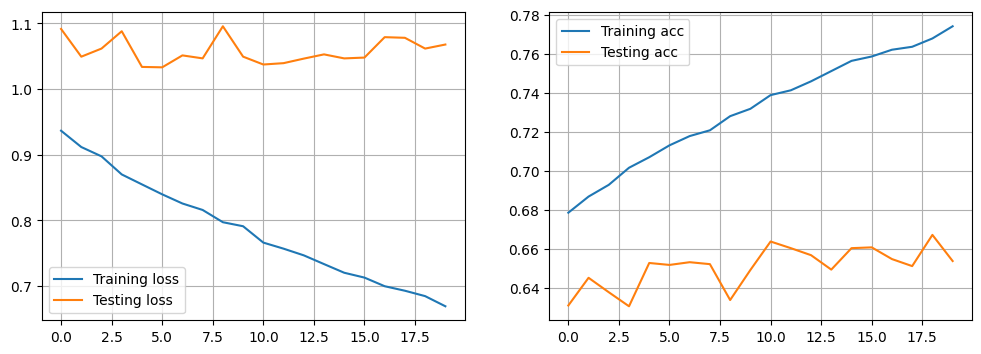

In [16]:
# Plot train logs
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

In [17]:
# Evaluate on test data
loss_test, metric_test = model.evaluate(X_test, Y_test)# ... evaluate model performance on test set
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.6383 - loss: 1.0655
Test loss: 1.0770338773727417
Test accuracy: 0.635200023651123


## Part 2: Deeper CNNs

In [113]:
summaries = []
train_accs = []
test_accs = []

In [132]:
input_dim = X_train.shape[1:]
model = keras.Sequential()
model.add(keras.layers.Conv2D(8, (3,3), padding='valid', input_shape = input_dim))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Conv2D(32, (3,3), strides=(2,2),padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Conv2D(64, (3,3), strides=(2,2),padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Conv2D(128, (3,3), padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy']) 
model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_64 (Conv2D)              │ (None, 30, 30, 8)      │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_63 (Activation)      │ (None, 30, 30, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_65 (Conv2D)              │ (None, 15, 15, 32)     │         2,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_64 (Activation)      │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_66 (Conv2D)              │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_65 (Activation)      │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_67 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_66 (Activation)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_20 (Flatten)            │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │        81,930 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 176,842 (690.79 KB)

 Trainable params: 176,842 (690.79 KB)

 Non-trainable params: 0 (0.00 B)

In [133]:
E = 10
B = 128
log = model.fit(X_train, Y_train, batch_size=B, epochs=E, validation_split= 0.1)
print('Train accuracy;', log.history['accuracy'][-1])
loss_test, metric_test = model.evaluate(X_test, Y_test) 
print('Test accuracy:', metric_test)

Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3397 - loss: 1.8122 - val_accuracy: 0.4646 - val_loss: 1.4498
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5385 - loss: 1.3012 - val_accuracy: 0.6026 - val_loss: 1.1442
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6311 - loss: 1.0621 - val_accuracy: 0.6250 - val_loss: 1.0811
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6832 - loss: 0.9265 - val_accuracy: 0.6540 - val_loss: 0.9984
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7183 - loss: 0.8182 - val_accuracy: 0.6948 - val_loss: 0.9114
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7548 - loss: 0.7129 - val_accuracy: 0.7020 - val_loss: 0.8830
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7812 - loss: 0.6371 - val_accuracy: 0.7100 - val_loss: 0.8774
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8097 - loss: 0.5600 - val_accuracy: 0.

In [129]:
summaries.append('1 3x3 Conv (D=8, S=1, P=valid), 1 3x3 Conv (D=32, S=2, P=same),  1 3x3 Conv (D=64, S=2, P=same), 1 3x3 Conv (D=128, S=1, P=same), 1 Dense' )
train_accs.append(log.history['accuracy'])
test_accs.append(metric_test)

In [130]:

for i in range(len(summaries)):
    print(f'CNN Nr: {i+1} \n  Architecture {summaries[i]} \n  Train Acc: {train_accs[i][-1]:.3f} \n  Test Acc: {test_accs[i]:.3f}')

CNN Nr: 1 
  Architecture 1 3x3 Conv (D=8, S=1, P=same) 1 Dense, 1 3x3 Conv (D=32, S=2, P=same), 1 3x3 Conv (D=64, S=2, P=same), 1 3x3 Conv (D=128, S=1, P=same), 1 Dense 
  Train Acc: 0.975 
  Test Acc: 0.656
CNN Nr: 2 
  Architecture 5 3x3 Conv (D=32, S=1, P=same), 1 Dense 
  Train Acc: 0.976 
  Test Acc: 0.631
CNN Nr: 3 
  Architecture 2 3x3 Conv (D=16, S=1, P=same), 1 2x2 Maxpool, 2 3x3 Conv (D=64, S=1, P=same), 1 Dense 
  Train Acc: 0.864 
  Test Acc: 0.719


In [121]:
del summaries[-1]
del train_accs[-1]
del test_accs[-1]